In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

emissions_df = pd.read_parquet(r'C:\Users\HP\Desktop\FAO_CARBON_FOOTPRINT\fao_carbon_footprint\data\FAOSTAT\clean_data\all_tables_processed-20240805T154622Z-001\all_tables_processed\tablas_emisiones\merged_food_emissions_v2.parquet')

In [3]:
emissions_df.sample(10)

,Area Code,Area,Year,Item Code,Item,Stocks_(An),crops_or_livestock,Burning_crop_residues_(Emissions_CH4_CO2eq)_(kt),Burning_crop_residues_(Emissions_N2O_CO2eq)_(kt),Crop_residues_(Emissions_N2O_CO2eq)_(kt),...,Rice_cultivation_(Emissions_CH4_CO2eq)_(kt),Synthetic_fertilizers_(Emissions_N2O_CO2eq)_(kt),Emissions_(N2O_CO2eq)_(Manure_applied)_(kt),Enteric_fermentation_(Emissions_CH4_CO2eq)_(kt),Livestock_total_(Emissions_CH4_CO2eq)_(kt),Livestock_total_(Emissions_N2O_CO2eq)_(kt),Manure_left_on_pasture_(Emissions_N2O_CO2eq)_(kt),Manure_management_(Emissions_CH4_CO2eq)_(kt),Manure_management_(Emissions_N2O_CO2eq)_(kt),production_TOTAL_(emissions_CO2eq)_(kt)
75892,98,Croatia,2006,1052,"Chickens, layers",5758000.0,livestock,0.0,0.0,0.0000,...,0.0,0.0,21.0675,0.0000,29.3580,29.3620,0.7420,29.3580,7.5525,58.7200
108542,134,Malta,1985,1054,Chickens,1000000.0,livestock,0.0,0.0,0.0000,...,0.0,0.0,0.0000,0.0000,3.7212,4.2400,0.1060,3.7212,1.0865,7.9612
135401,170,Peru,1975,71,Rye,0.0,crops,0.0,0.0,0.0530,...,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0530
62398,79,Germany,1989,2029,Poultry Birds,125799000.0,livestock,0.0,0.0,0.0000,...,0.0,0.0,0.0000,0.0000,391.1964,560.3955,13.9920,391.1964,144.2130,951.5919
114637,143,Morocco,1981,976,Sheep,15675000.0,livestock,0.0,0.0,0.0000,...,0.0,0.0,21.4120,2194.5000,2260.3336,1136.6645,1101.1280,65.8336,14.1245,3396.9981
35287,44,Colombia,1970,960,"Cattle, dairy",2521000.0,livestock,0.0,0.0,0.0000,...,0.0,0.0,520.6190,5082.3360,5152.9240,1207.3400,642.2805,70.5880,44.4405,6360.2640
49112,58,Ecuador,2019,44,Barley,0.0,crops,0.0,0.0,0.9805,...,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.9805
192568,238,Ethiopia,2016,236,Soya beans,0.0,crops,0.0,0.0,5.8035,...,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.8035
42676,52,Azerbaijan,2000,236,Soya beans,0.0,crops,0.0,0.0,0.0000,...,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
181310,225,United Arab Emirates,2021,1016,Goats,2381525.0,livestock,0.0,0.0,0.0000,...,0.0,0.0,0.0000,333.4128,348.0848,212.0000,212.0000,14.6692,0.0000,560.0848


In [5]:
# There are countries and regions
# Function to select either coutries, continents, develop or world

def select_fao_region(df, region='country', path_to_areas=None, codes_col='Area Code'):
    """
    Selects data from a DataFrame based on specified FAO region.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing data to be filtered.
    region (str): The region to filter by. Options are 'country', 'continent', 'developed', or 'world'.
                  Default is 'country'.
    path_to_areas (str): Path to the CSV file containing area codes and their definitions. Required if region is 'country'.
    codes_col (str): The column name in df and the area codes file that contains the area codes. Default is 'Area Code'.

    Returns:
    pd.DataFrame: A DataFrame filtered by the specified region.

    Raises:
    ValueError: If region is 'country' and path_to_areas is not provided.
    """
    
    # Make a copy of the input DataFrame to avoid modifying the original data
    df = df.copy()
    
    # Define the area codes for different regions
    continent_codes = [5500, 5400, 5300, 5207, 5204, 5203, 5100]
    developed_codes = [5849, 5848]
    world_codes = [5000]
    
    if region == 'country':
        if not path_to_areas:
            raise ValueError("path_to_areas must be provided when selecting countries.")
        # Read the area codes from the CSV file, ensuring no duplicate entries
        area_codes = pd.read_csv(path_to_areas, encoding="ISO-8859-1").drop_duplicates()
        country_codes = area_codes[area_codes[codes_col] < 3000][codes_col].to_list()
        df = df[df[codes_col].isin(country_codes)]
    elif region == 'continent':
        df = df[df[codes_col].isin(continent_codes)]
    elif region == 'developed':
        df = df[df[codes_col].isin(developed_codes)]
    elif region == 'world':
        df = df[df[codes_col].isin(world_codes)]
    
    return df


In [10]:
df = select_fao_region(emissions_df, region='world')
df.sample(10)

,Area Code,Area,Year,Item Code,Item,Stocks_(An),crops_or_livestock,Burning_crop_residues_(Emissions_CH4_CO2eq)_(kt),Burning_crop_residues_(Emissions_N2O_CO2eq)_(kt),Crop_residues_(Emissions_N2O_CO2eq)_(kt),...,Rice_cultivation_(Emissions_CH4_CO2eq)_(kt),Synthetic_fertilizers_(Emissions_N2O_CO2eq)_(kt),Emissions_(N2O_CO2eq)_(Manure_applied)_(kt),Enteric_fermentation_(Emissions_CH4_CO2eq)_(kt),Livestock_total_(Emissions_CH4_CO2eq)_(kt),Livestock_total_(Emissions_N2O_CO2eq)_(kt),Manure_left_on_pasture_(Emissions_N2O_CO2eq)_(kt),Manure_management_(Emissions_CH4_CO2eq)_(kt),Manure_management_(Emissions_N2O_CO2eq)_(kt),production_TOTAL_(emissions_CO2eq)_(kt)
201621,5000,World,1970,961,"Cattle, non-dairy",8.967870e+08,livestock,0.0000,0.000,0.0000,...,0.0,0.0,37112.9320,1.118128e+06,1.168688e+06,315418.1845,236315.4460,50559.6532,41989.8065,1.484106e+06
202190,5000,World,1994,79,Millet,0.000000e+00,crops,0.0000,0.000,1776.3480,...,0.0,0.0,0.0000,0.000000e+00,0.000000e+00,0.0000,0.0000,0.0000,0.0000,1.776348e+03
202845,5000,World,2021,961,"Cattle, non-dairy",1.252132e+09,livestock,0.0000,0.000,0.0000,...,0.0,0.0,31363.2535,1.539239e+06,1.592957e+06,459530.7230,386384.4955,53717.8740,41782.9740,2.052487e+06
202751,5000,World,2017,1016,Goats,1.048654e+09,livestock,0.0000,0.000,0.0000,...,0.0,0.0,3231.8075,1.468116e+05,1.518987e+05,95009.4165,90778.5855,5087.1576,999.0500,2.469081e+05
202110,5000,World,1990,1757,Cattle,1.296587e+09,livestock,0.0000,0.000,0.0000,...,0.0,0.0,0.0000,1.863728e+06,1.988117e+06,503290.7295,349177.8860,124389.1796,72338.1895,2.491408e+06
202312,5000,World,1999,116,Potatoes,0.000000e+00,crops,0.0000,0.000,3608.1340,...,0.0,0.0,0.0000,0.000000e+00,0.000000e+00,0.0000,0.0000,0.0000,0.0000,3.608134e+03
202693,5000,World,2015,75,Oats,0.000000e+00,crops,0.0000,0.000,1332.8970,...,0.0,0.0,0.0000,0.000000e+00,0.000000e+00,0.0000,0.0000,0.0000,0.0000,1.332897e+03
202437,5000,World,2004,961,"Cattle, non-dairy",1.124871e+09,livestock,0.0000,0.000,0.0000,...,0.0,0.0,33369.4360,1.418602e+06,1.469898e+06,411486.0375,332697.8010,51296.4228,45418.8005,1.881384e+06
201737,5000,World,1975,156,Sugar cane,0.000000e+00,crops,599.4296,147.075,0.0000,...,0.0,0.0,0.0000,0.000000e+00,0.000000e+00,0.0000,0.0000,0.0000,0.0000,7.465046e+02
202716,5000,World,2016,71,Rye,0.000000e+00,crops,0.0000,0.000,727.6635,...,0.0,0.0,0.0000,0.000000e+00,0.000000e+00,0.0000,0.0000,0.0000,0.0000,7.276635e+02


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


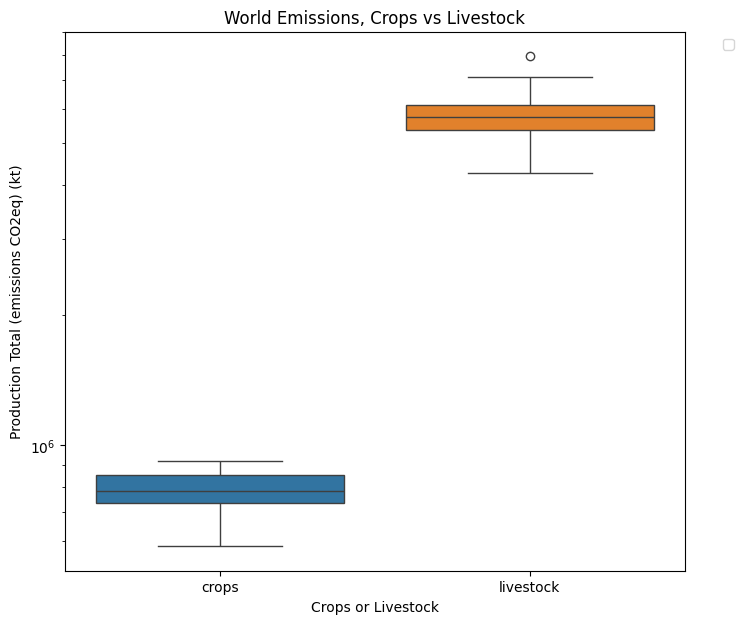

In [25]:
# Filtra los datos donde la producción total de emisiones sea mayor que 0 y agrupa por 'crops_or_livestock' y 'Year'
df_grouped = df[df['production_TOTAL_(emissions_CO2eq)_(kt)'] > 0].groupby(['crops_or_livestock', 'Year']).sum().reset_index().sort_values(by='production_TOTAL_(emissions_CO2eq)_(kt)')

# Crea el gráfico
plt.figure(figsize=(8, 7))

sns.boxplot(data=df_grouped, x='crops_or_livestock', y='production_TOTAL_(emissions_CO2eq)_(kt)', hue='crops_or_livestock')
plt.yscale('log')

# Ajusta la posición de la leyenda a la derecha del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Añade título y etiquetas
plt.title('World Emissions, Crops vs Livestock')
plt.xlabel('Crops or Livestock')
plt.ylabel('Production Total (emissions CO2eq) (kt)')

# Muestra el gráfico
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


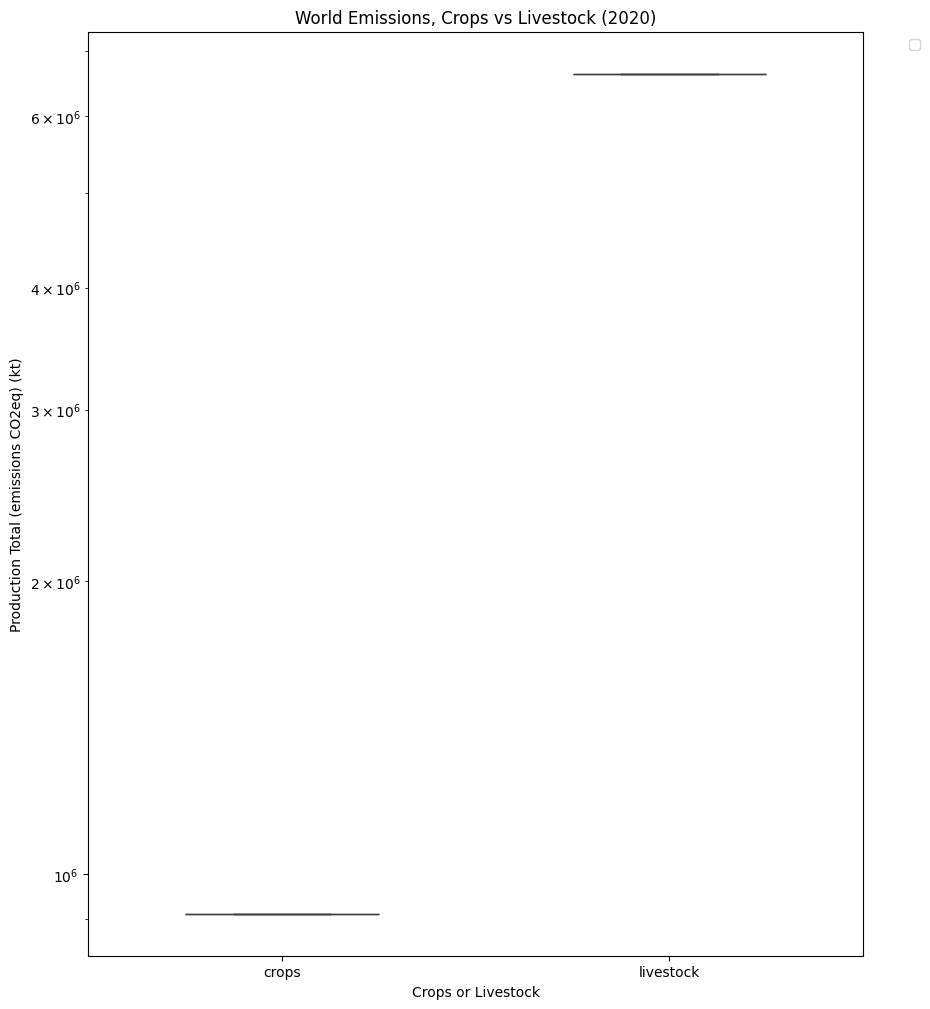

In [29]:

df_2020 = df[(df['production_TOTAL_(emissions_CO2eq)_(kt)'] > 0) & (df['Year'] == 2020)]

# Agrupa por 'crops_or_livestock' y suma las emisiones
df_grouped_2020 = df_2020.groupby(['crops_or_livestock']).sum().reset_index().sort_values(by='production_TOTAL_(emissions_CO2eq)_(kt)')

plt.figure(figsize=(10, 12))  # Aumenta el tamaño del gráfico y lo hace más alto que ancho

sns.boxplot(data=df_grouped_2020, x='crops_or_livestock', y='production_TOTAL_(emissions_CO2eq)_(kt)', hue='crops_or_livestock', width=0.5)  # Ajusta el width de los boxplots
plt.yscale('log')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('World Emissions, Crops vs Livestock (2020)')
plt.xlabel('Crops or Livestock')
plt.ylabel('Production Total (emissions CO2eq) (kt)')

plt.show()
